# Séries Temporais e Forecasting

<img src="https://miro.medium.com/max/364/1*46jxiV9PiL5omTI9FDoW3Q.png" width=600>

## Revisão e manipulação de dados em Séries Temporais

__Séries temporais__ nada mais é do que um conjunto de dados que foram gravados __sequencialmente__ ao longo de um __período de tempo__.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
# !pip install pandas-datareader

In [3]:
# import para o DataReader
from pandas_datareader.data import DataReader

# import para a biblioteca plotly
import plotly
import plotly.graph_objs as go
from plotly.offline import *

### Manipulação de datas

In [5]:
hoje_str = '10/11/2021'
ontem_str = '9/11/2021'

In [7]:
hoje_str, ontem_str

('10/11/2021', '9/11/2021')

In [9]:
hoje_dt = dt.date(2021,11,10)
hoje_dt

datetime.date(2021, 11, 10)

In [10]:
print("DT: ", hoje_dt, type(hoje_dt))
print("str: ", hoje_str, type(hoje_str))

DT:  2021-11-10 <class 'datetime.date'>
str:  10/11/2021 <class 'str'>


In [11]:
horario_str = "19:29:00"
horario_dt = dt.time(19, 29, 0)

print("DT: ", horario_dt, type(horario_dt))
print("str: ", horario_str, type(horario_str))

DT:  19:29:00 <class 'datetime.time'>
str:  19:29:00 <class 'str'>


In [12]:
completo_str = "30/11/2020 19:29:00"
completo_dt = dt.datetime(2020, 11, 30, 19, 29, 10, 10)

print("DT: ", completo_dt, type(completo_dt))
print("str: ", completo_str, type(completo_str))

DT:  2020-11-30 19:29:10.000010 <class 'datetime.datetime'>
str:  30/11/2020 19:29:00 <class 'str'>


In [13]:
completo_dt

datetime.datetime(2020, 11, 30, 19, 29, 10, 10)

In [14]:
completo_dt.year

2020

In [15]:
completo_dt.hour

19

In [17]:
completo_dt.date()

datetime.date(2020, 11, 30)

In [18]:
completo_dt.time()

datetime.time(19, 29, 10, 10)

In [19]:
completo_str.year

AttributeError: 'str' object has no attribute 'year'

In [21]:
amanha_dt = dt.datetime(2021, 11, 11, 19, 29, 10, 10)
dt.datetime.today()

datetime.datetime(2021, 11, 10, 21, 2, 1, 972031)

In [22]:
dt.date.today()

datetime.date(2021, 11, 10)

In [23]:
dt.datetime.now()

datetime.datetime(2021, 11, 10, 21, 2, 20, 206797)

https://docs.python.org/3/library/datetime.html

Transformar uma classe de datetime para string

In [24]:
### strftime => string from time

print('%d/%m/%y :', dt.datetime.strftime(amanha_dt, format='%d/%m/%y'))
print('%d/%m/%Y :', dt.datetime.strftime(amanha_dt, format='%d/%m/%Y'))
print('%d/%B/%y :', dt.datetime.strftime(amanha_dt, format='%d/%B/%y'))
print('%w/%b/%y :', dt.datetime.strftime(amanha_dt, format='%w/%b/%y')) # %w => weekday

%d/%m/%y : 11/11/21
%d/%m/%Y : 11/11/2021
%d/%B/%y : 11/November/21
%w/%b/%y : 4/Nov/21


https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

Transformar uma string para datetime

In [20]:
### strptime => string para time

print(f"String: {hoje_str}; Datetime:{dt.datetime.strptime(hoje_str, '%d/%m/%Y')}")
print(f"String: {'30 de January de 2021'}; \
      Datetime:{dt.datetime.strptime('30 de January de 2021', '%d de %B de %Y')}")

%d/%m/%y : 11/11/21
%d/%m/%Y : 11/11/2021
%d/%B/%y : 11/November/21
%w/%b/%y : 4/Nov/21
String: 10/11/2021; Datetime:2021-11-10 00:00:00
String: 30 de January de 2021;       Datetime:2021-01-30 00:00:00


**Exemplo**

In [25]:
df_airline = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo4/Datasets/airline_passengers.csv')
df_airline.head()

,Mês,Milhares de passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [26]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Mês                      144 non-null    object
 1   Milhares de passageiros  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [30]:
# Transformar a coluna mês de objeto para string

df_airline['data'] = pd.to_datetime(df_airline['Mês'], format='%Y-%m')

In [31]:
df_airline

,Mês,Milhares de passageiros,data
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01
...,...,...,...
139,1960-08,606,1960-08-01
140,1960-09,508,1960-09-01
141,1960-10,461,1960-10-01
142,1960-11,390,1960-11-01


In [32]:
df_airline['data'].dt.year

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: data, Length: 144, dtype: int64

In [33]:
df_airline['data'].dt.month

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: data, Length: 144, dtype: int64

**ATENÇÃO**: quando trabalhamos com séries temporais colocamos a data no index da série/dataframe

Podemos usar df.set_index('data')

In [36]:
df_airline = df_airline.set_index('data').drop(columns=['Mês'])
df_airline

,Milhares de passageiros
data,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [37]:
# busca nas datas do index
df_airline[:'1950']

,Milhares de passageiros
data,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [38]:
df_airline.loc['1958']

,Milhares de passageiros
data,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505
1958-09-01,404


In [39]:
df_airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='data', length=144, freq=None)

In [40]:
# Reamostragem dos dados - RESAMPLE

df_airline.resample('3M').sum() # reamostragem a cada 3 meses e soma a quantidade de passageiros

,Milhares de passageiros
data,
1949-01-31,112
1949-04-30,379
1949-07-31,404
1949-10-31,403
1950-01-31,337
1950-04-30,402
1950-07-31,444
1950-10-31,461
1951-01-31,399


In [41]:
df_airline.resample('Y').sum() # quantidade de passageiros por ano

,Milhares de passageiros
data,
1949-12-31,1520
1950-12-31,1676
1951-12-31,2042
1952-12-31,2364
1953-12-31,2700
1954-12-31,2867
1955-12-31,3408
1956-12-31,3939
1957-12-31,4421


**Visualização dos dados**

<AxesSubplot:xlabel='data', ylabel='Milhares de passageiros'>

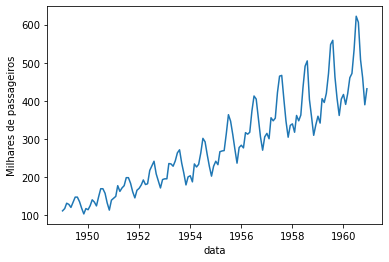

In [42]:
sns.lineplot(data= df_airline['Milhares de passageiros'])

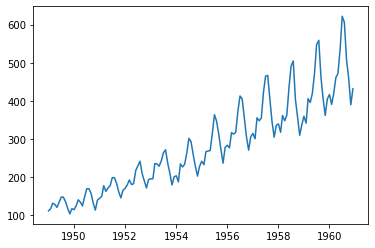

In [43]:
plt.plot(df_airline)

In [45]:
df_airline.reset_index()

,data,Milhares de passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


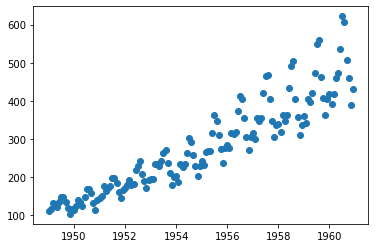

In [50]:
plt.scatter(data=df_airline.reset_index(), x='data', y='Milhares de passageiros')
# para alterar valores de datas: 
# import matplotlib.dates as mdates

https://towardsdatascience.com/time-series-analysis-resampling-shifting-and-rolling-f5664ddef77e

**Shift**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

Deslocar

In [52]:
df_airline.shift()

,Milhares de passageiros
data,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0
...,...
1960-08-01,622.0
1960-09-01,606.0
1960-10-01,508.0


In [54]:
df_airline.shift(2)

,Milhares de passageiros
data,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,112.0
1949-04-01,118.0
1949-05-01,132.0
...,...
1960-08-01,535.0
1960-09-01,622.0
1960-10-01,606.0


In [55]:
df_airline.shift(-1)

,Milhares de passageiros
data,
1949-01-01,118.0
1949-02-01,132.0
1949-03-01,129.0
1949-04-01,121.0
1949-05-01,135.0
...,...
1960-08-01,508.0
1960-09-01,461.0
1960-10-01,390.0


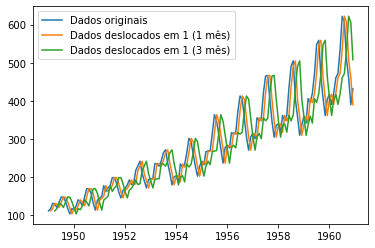

In [59]:
plt.plot(df_airline, label='Dados originais')
plt.plot(df_airline.shift(), label='Dados deslocados em 1 (1 mês)')
plt.plot(df_airline.shift(3), label='Dados deslocados em 1 (3 mês)')
plt.legend()

[]

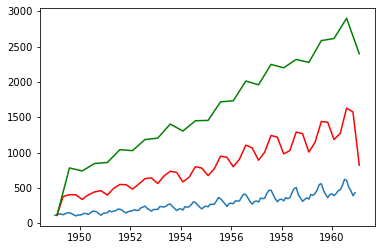

In [60]:
plt.plot(df_airline, label='Dados originais')
plt.plot()
plt.plot(df_airline.resample('3M').sum(), label='shift', color='r')
plt.plot()
plt.plot(df_airline.resample('6M').sum(), label='shift', color='green')
plt.plot()

**Rolling - Janelas deslizantes**

In [64]:
df_airline.rolling(window=7).mean()

,Milhares de passageiros
data,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,500.857143
1960-09-01,517.571429
1960-10-01,523.571429


In [65]:
df_airline.rolling(window=7).std()

,Milhares de passageiros
data,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,89.523607
1960-09-01,75.403044
1960-10-01,67.510140


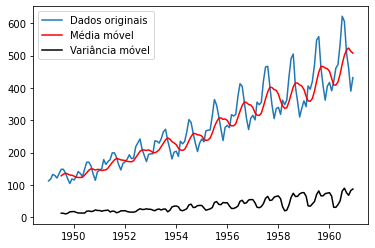

In [66]:
plt.plot(df_airline, label='Dados originais')
plt.plot(df_airline.rolling(7).mean(), color='red', label='Média móvel')
plt.plot(df_airline.rolling(7).std(), color='black', label='Variância móvel')
plt.legend()

### Obter dados

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

https://finance.yahoo.com/

Vamos usar o DataReader, para podermos extrair os dados sobre as ações para a Duratex (__PETR4.SA__) do _Yahoo! Fiinance_:

In [67]:
# Sigla PETR4.SA

symbol = 'PETR4.SA'
df = DataReader(name = symbol,
                data_source = 'yahoo',
                start='2010-01-01',
                end='2021-11-10')

In [69]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,37.320000,36.820000,36.950001,37.320000,13303600.0,26.560337
2010-01-05,37.430000,36.799999,37.380001,37.000000,21396400.0,26.332586
2010-01-06,37.500000,36.799999,36.799999,37.500000,18720600.0,26.688440
2010-01-07,37.450001,37.070000,37.270000,37.150002,10964600.0,26.439342
2010-01-08,37.389999,36.860001,37.160000,36.950001,14624200.0,26.297003


In [70]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-04,27.240000,25.850000,27.020000,26.000000,92603400.0,26.000000
2021-11-05,26.540001,25.780001,26.290001,25.850000,86264000.0,25.850000
2021-11-08,26.660000,25.719999,25.809999,26.120001,59704100.0,26.120001
2021-11-09,26.950001,26.200001,26.200001,26.639999,73021700.0,26.639999
2021-11-10,26.930000,26.160000,26.600000,26.430000,68176300.0,26.430000


In [71]:
precos = df[df.index < '2021-01-01']['Adj Close']
precos

Date
2010-01-04    26.560337
2010-01-05    26.332586
2010-01-06    26.688440
2010-01-07    26.439342
2010-01-08    26.297003
                ...    
2020-12-22    24.908234
2020-12-23    25.519983
2020-12-28    25.729984
2020-12-29    25.812160
2020-12-30    25.876074
Name: Adj Close, Length: 2725, dtype: float64

Com o auxílio da biblioteca _Plotly_, vamos criar um gráfico dinâmico para podermos avaliar a variação das ações:

In [72]:
# pra plotar no jupyter
init_notebook_mode(connected=True)
    
# definindo os dados a serem plotados (note os índices no eixo x)
data = [go.Scatter(x=precos.index, y = precos)]

# definindo os botões interativos
botoes = {"buttons" : [{"count" : 1, "label" : "1m", "step" : "month", "stepmode" : "backward"},
                       {"count" : 6, "label" : "6m", "step" : "month", "stepmode" : "backward"}, 
                       {"step" : "all"}]
         }

# definindo o eixo x com a interatividade: botões e uma janela deslizante
eixo_x = {"rangeselector" : botoes,
          "rangeslider" : {"visible" : True}
         }

# definindo o layout
layout = {"title" : "PETR4 - preço de fechamento ajustado",
          "xaxis" : eixo_x}

# dicionario final para o plot
fig = {"data" : data, "layout" : layout}

# fazendo o plot
plotly.offline.iplot(fig)

<AxesSubplot:xlabel='Date'>

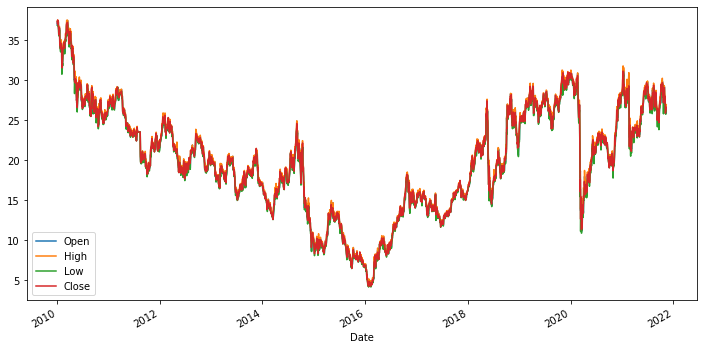

In [73]:
df[['Open', 'High', 'Low', 'Close']].plot(figsize=(12,6))

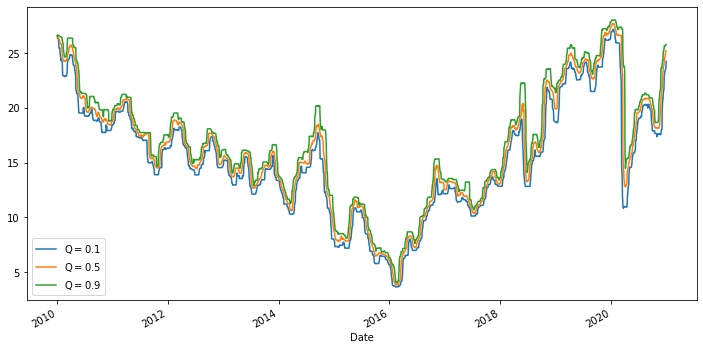

In [76]:
precos.rolling(window="30D").quantile(0.1).plot(figsize=(12,6), label='$Q = 0.1$')
precos.rolling(window="30D").median().plot(figsize=(12,6), label='$Q = 0.5$')
precos.rolling(window="30D").quantile(0.9).plot(figsize=(12,6), label='$Q = 0.9$')
plt.legend()

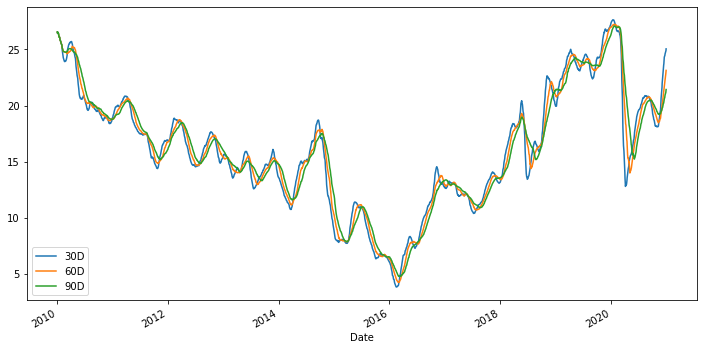

In [78]:
precos.rolling(window='30D').mean().plot(figsize=(12, 6), label='30D')
precos.rolling(window='60D').mean().plot(figsize=(12, 6), label='60D')
precos.rolling(window='90D').mean().plot(figsize=(12, 6), label='90D')

plt.legend()

<AxesSubplot:xlabel='Date'>

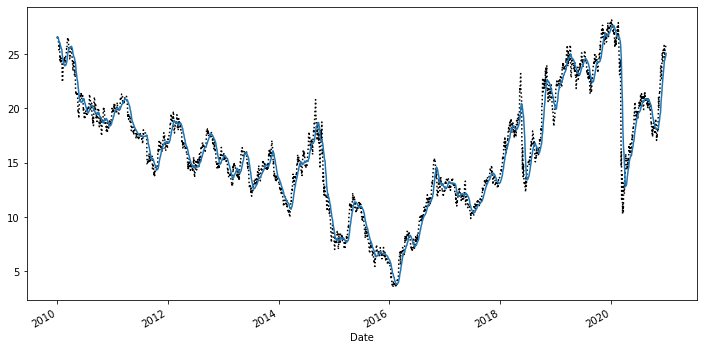

In [77]:
precos.plot(figsize=(12, 6), style='k:')
precos.rolling(window='30D').mean().plot(figsize=(12, 6))

**Taxa de retorno**

- retorno de um período único

$$ r_t = \frac{P_t}{P_{t-1}} -1 $$

- retorno de vários períodos
$$ R_T = (1 + r_1)(1 + r_2)...(1 + r_T) - 1 $$

In [80]:
# retorno de um período único
precos.head()

Date
2010-01-04    26.560337
2010-01-05    26.332586
2010-01-06    26.688440
2010-01-07    26.439342
2010-01-08    26.297003
Name: Adj Close, dtype: float64

In [81]:
(precos.iloc[1] - precos.iloc[0])/precos.iloc[0]

-0.008574845177104697

In [82]:
(precos.iloc[2] - precos.iloc[1])/precos.iloc[1]

0.013513827716189192

In [83]:
precos.pct_change()

Date
2010-01-04         NaN
2010-01-05   -0.008575
2010-01-06    0.013514
2010-01-07   -0.009334
2010-01-08   -0.005384
                ...   
2020-12-22    0.009623
2020-12-23    0.024560
2020-12-28    0.008229
2020-12-29    0.003194
2020-12-30    0.002476
Name: Adj Close, Length: 2725, dtype: float64

Demonstração de dados

In [84]:
df_value = pd.DataFrame(np.arange(20, 100, 20),
                       index=pd.date_range(start="2020", periods=4, freq="Q"),
                       columns=['value'])
df_value

,value
2020-03-31,20
2020-06-30,40
2020-09-30,60
2020-12-31,80


In [85]:
df_value['r'] = df_value['value'].pct_change()
df_value['cumulative_sum'] = df_value['value'].cumsum()
df_value['cumulative_prod'] = df_value['value'].cumprod()

In [86]:
df_value

,value,r,cumulative_sum,cumulative_prod
2020-03-31,20,NaN,20,20
2020-06-30,40,1.000000,60,800
2020-09-30,60,0.500000,120,48000
2020-12-31,80,0.333333,200,3840000


In [87]:
df_airline.diff()

,Milhares de passageiros
data,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0
